#Basic Libraries

In [126]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# importing data visualization libraries
import plotly.graph_objects as go

In [128]:
# importing time series forecasting algorithms
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

In [140]:
# importing validation metrics
from sklearn.metrics import mean_absolute_percentage_error

#Train Test Split

In [130]:
# read daily_data.csv
df = pd.read_csv("/content/drive/MyDrive/Projects/Loyalist College/AISC 2006 Step Presentation/Project/daily_data.csv")

In [131]:
# checking bottom 5 rows
df.tail()

,day,MarketDemand(MW),OntarioDemand(MW),NuclearSupply(MW),GasSupply(MW),HydroSupply(MW),WindSupply(MW),SolarSupply(MW),BiofuelSupply(MW),TotalSupply(MW),HOEP($/MWh)
7685,2023-05-16,391504,333693,221282.0,6722.0,108307.0,51130.0,2446.0,173.0,390060.0,4.97375
7686,2023-05-17,383168,332480,220494.0,16727.0,115938.0,24188.0,3286.0,229.0,380862.0,11.64125
7687,2023-05-18,389998,336961,220825.0,22398.0,127776.0,13723.0,3653.0,298.0,388673.0,17.17250
7688,2023-05-19,391370,334571,221449.0,7248.0,114151.0,42442.0,2343.0,499.0,388132.0,6.00625
7689,2023-05-20,375425,319559,211964.0,7067.0,118000.0,31043.0,1332.0,998.0,370404.0,9.33000


In [132]:
# find splitting value at 90%
total = df['day'].count()
split = (total*0.9).astype(np.int32)

In [133]:
# split into train and test data
train = df[:split]
test = df[split:]

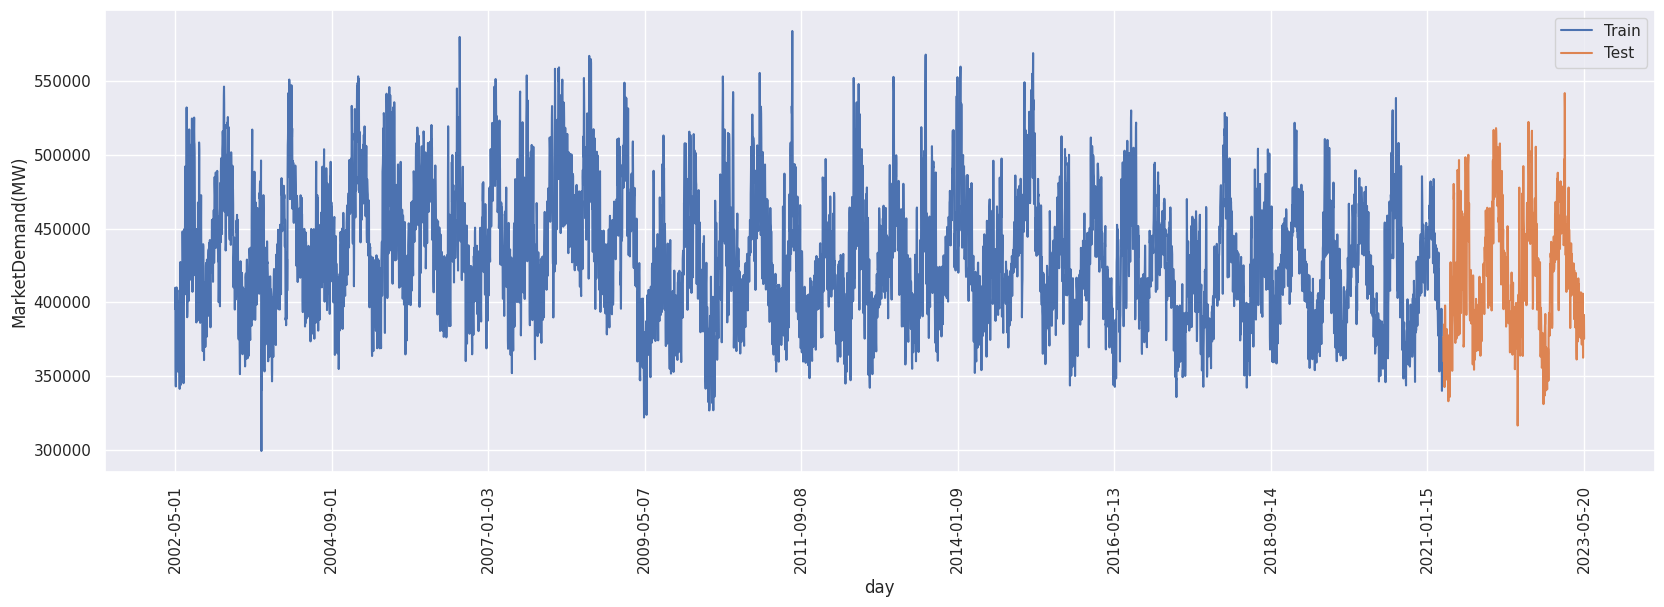

In [134]:
# plot train and test data
first_date = pd.to_datetime('2002-05-01').date()
last_date = pd.to_datetime('2023-05-20').date()
dates = pd.date_range(start=first_date, end=last_date, periods=10).date
dates = [str(date) for date in dates]

sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 6))
sns.lineplot(data=train, x='day', y='MarketDemand(MW)', label='Train')
sns.lineplot(data=test, x='day', y='MarketDemand(MW)', label='Test')
ax.set_xticks(dates)
ax.set_xticklabels(dates, rotation=90)
plt.legend()
plt.show()

#Triple Exponential Smoothing

In [171]:
# plotting by Triple Exponential Smoothing
def plot_triple_exponential_smoothing(dependent_attribute):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=train['day'], y=train[dependent_attribute], name='Train'))
  fig.add_trace(go.Scatter(x=test['day'], y=test[dependent_attribute], name='Test'))
  fig.add_trace(go.Scatter(x=test['day'], y=tes_forecasts, name='Forecast'))
  fig.update_layout(template="simple_white", font=dict(size=18), title_text=dependent_attribute+" by Day",
                    width=1500, title_x=0.5, height=400, xaxis_title='day',
                    yaxis_title=dependent_attribute)
  return fig

In [172]:
# predicting MarketDemand(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train['MarketDemand(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

In [173]:
# plot MarketDemand(MW) vs day
plot_triple_exponential_smoothing("MarketDemand(MW)")

In [174]:
# test MarketDemand(MW)
mean_absolute_percentage_error(test['MarketDemand(MW)'], tes_forecasts)

0.05948273402479088

In [175]:
# predicting OntarioDemand(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train['OntarioDemand(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

In [176]:
# plot OntarioDemand(MW) vs day
plot_triple_exponential_smoothing("OntarioDemand(MW)")

In [177]:
# test OntarioDemand(MW)
mean_absolute_percentage_error(test['OntarioDemand(MW)'], tes_forecasts)

0.06826171975208889

In [178]:
# predicting NuclearSupply(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train[pd.DatetimeIndex(train['day']).year >= 2015]['NuclearSupply(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [179]:
# plot NuclearSupply(MW) vs day
plot_triple_exponential_smoothing("NuclearSupply(MW)")

In [180]:
# test NuclearSupply(MW)
mean_absolute_percentage_error(test['NuclearSupply(MW)'], tes_forecasts)

0.08602486620252785

In [181]:
# predicting GasSupply(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train[pd.DatetimeIndex(train['day']).year >= 2015]['GasSupply(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [182]:
# plot GasSupply(MW) vs day
plot_triple_exponential_smoothing("GasSupply(MW)")

In [183]:
# test GasSupply(MW)
mean_absolute_percentage_error(test['GasSupply(MW)'], tes_forecasts)

0.6753274580982175

In [184]:
# predicting HydroSupply(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train[pd.DatetimeIndex(train['day']).year >= 2015]['HydroSupply(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [185]:
# plot HydroSupply(MW) vs day
plot_triple_exponential_smoothing("HydroSupply(MW)")

In [186]:
# test HydroSupply(MW)
mean_absolute_percentage_error(test['HydroSupply(MW)'], tes_forecasts)

0.11840176855980905

In [187]:
# predicting WindSupply(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train[pd.DatetimeIndex(train['day']).year >= 2015]['WindSupply(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [188]:
# plot WindSupply(MW) vs day
plot_triple_exponential_smoothing("WindSupply(MW)")

In [189]:
# test WindSupply(MW)
mean_absolute_percentage_error(test['WindSupply(MW)'], tes_forecasts)

1.0755031897379812

In [190]:
# predicting BiofuelSupply(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train[pd.DatetimeIndex(train['day']).year >= 2015]['BiofuelSupply(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [191]:
# plot BiofuelSupply(MW) vs day
plot_triple_exponential_smoothing("BiofuelSupply(MW)")

In [192]:
# test BiofuelSupply(MW)
mean_absolute_percentage_error(test['BiofuelSupply(MW)'], tes_forecasts)

2.748134080023311e+17

In [193]:
# predicting TotalSupply(MW) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train[pd.DatetimeIndex(train['day']).year >= 2015]['TotalSupply(MW)'], trend='add', seasonal='add', seasonal_periods=182)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [194]:
# plot TotalSupply(MW) vs day
plot_triple_exponential_smoothing("TotalSupply(MW)")

In [195]:
# test TotalSupply(MW)
mean_absolute_percentage_error(test['TotalSupply(MW)'], tes_forecasts)

0.09606237461351248

In [196]:
# predicting HOEP($/MWh) by Triple Exponential Smooting algorithm
tes_model = ExponentialSmoothing(train['HOEP($/MWh)'], trend='add', seasonal='add', seasonal_periods=180)
tes_model_fit = tes_model.fit(method='ls')
tes_forecasts = tes_model_fit.forecast(len(test))

In [197]:
# plot HOEP($/MWh) vs day
plot_triple_exponential_smoothing("HOEP($/MWh)")

In [198]:
# test HOEP($/MWh)
mean_absolute_percentage_error(test['HOEP($/MWh)'], tes_forecasts)

0.9397234203665447

# Prophet Method

In [199]:
# plotting by Prophet method
def plot_prophet_method(dependent_attribute):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=train_df['ds'], y=train_df['y'], name='Train'))
  fig.add_trace(go.Scatter(x=test_df['ds'], y=test_df['y'], name='Test'))
  fig.add_trace(go.Scatter(x=test_forecast['ds'], y=test_forecast['yhat'], name='Forecast'))
  fig.update_layout(template="simple_white", font=dict(size=18), title_text=dependent_attribute+" by Day",
                      width=1500, title_x=0.5, height=400, xaxis_title='day',
                      yaxis_title=dependent_attribute)
  return fig

In [200]:
# predicting MarketDemand(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['MarketDemand(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['MarketDemand(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/xh12luit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/88iz_wjj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83160', 'data', 'file=/tmp/tmpxyc5awie/xh12luit.json', 'init=/tmp/tmpxyc5awie/88iz_wjj.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_modelq4kdwtcn/prophet_model-20230705231132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds           yhat
6921 2021-04-12  393025.248178
6922 2021-04-13  397119.985227
6923 2021-04-14  396149.484071
6924 2021-04-15  394621.890973
6925 2021-04-16  388190.139131
...         ...            ...
7685 2023-05-16  383118.573506
7686 2023-05-17  383392.589548
7687 2023-05-18  383161.858808
7688 2023-05-19  378081.187726
7689 2023-05-20  351583.135379

[769 rows x 2 columns]


In [201]:
# plot MarketDemand(MW) vs day
plot_prophet_method("MarketDemand(MW)")

In [202]:
# test MarketDemand(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.04699691998222775

In [203]:
# predicting OntarioDemand(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['OntarioDemand(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['OntarioDemand(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/v2bq0z8v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/35pj6lib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87679', 'data', 'file=/tmp/tmpxyc5awie/v2bq0z8v.json', 'init=/tmp/tmpxyc5awie/35pj6lib.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_model5ntcz3wj/prophet_model-20230705231157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:11:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds           yhat
6921 2021-04-12  343448.667145
6922 2021-04-13  348651.502194
6923 2021-04-14  347094.105100
6924 2021-04-15  344869.309137
6925 2021-04-16  337924.630046
...         ...            ...
7685 2023-05-16  330350.735827
7686 2023-05-17  330176.122338
7687 2023-05-18  329399.634761
7688 2023-05-19  323968.670552
7689 2023-05-20  296013.413154

[769 rows x 2 columns]


In [204]:
# plot OntarioDemand(MW) vs day
plot_prophet_method("OntarioDemand(MW)")

In [205]:
# test OntarioDemand(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.05189170957025258

In [206]:
# predicting NuclearSupply(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['NuclearSupply(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['NuclearSupply(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/pq9u3v_b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/c2sv8xk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88091', 'data', 'file=/tmp/tmpxyc5awie/pq9u3v_b.json', 'init=/tmp/tmpxyc5awie/c2sv8xk2.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_modelogssacf1/prophet_model-20230705231216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:12:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:12:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds           yhat
6921 2021-04-12  197989.638270
6922 2021-04-13  198097.899568
6923 2021-04-14  197501.482628
6924 2021-04-15  196420.409134
6925 2021-04-16  195190.117289
...         ...            ...
7685 2023-05-16  117747.251493
7686 2023-05-17  118986.382920
7687 2023-05-18  119833.523254
7688 2023-05-19  120608.781862
7689 2023-05-20  120336.206334

[769 rows x 2 columns]


In [207]:
# plot NuclearSupply(MW) vs day
plot_prophet_method("NuclearSupply(MW)")

In [208]:
# test NuclearSupply(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.19843430184983157

In [209]:
# predicting GasSupply(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['GasSupply(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['GasSupply(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/9jqi2za5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/5bxj3ely.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25400', 'data', 'file=/tmp/tmpxyc5awie/9jqi2za5.json', 'init=/tmp/tmpxyc5awie/5bxj3ely.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_modelx6hka6_9/prophet_model-20230705231237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:12:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:12:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds          yhat
6921 2021-04-12  17671.822707
6922 2021-04-13  18139.414335
6923 2021-04-14  16959.722306
6924 2021-04-15  15908.872923
6925 2021-04-16  13587.313590
...         ...           ...
7685 2023-05-16  20046.717585
7686 2023-05-17  19310.519171
7687 2023-05-18  18699.120629
7688 2023-05-19  16811.658189
7689 2023-05-20   8369.733298

[769 rows x 2 columns]


In [210]:
# plot GasSupply(MW) vs day
plot_prophet_method("GasSupply(MW)")

In [211]:
# test GasSupply(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.724515152132972

In [212]:
# predicting HydroSupply(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['HydroSupply(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['HydroSupply(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/_bmmrwaz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/1l8bue7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62651', 'data', 'file=/tmp/tmpxyc5awie/_bmmrwaz.json', 'init=/tmp/tmpxyc5awie/1l8bue7p.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_model0484oa_i/prophet_model-20230705231344.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:13:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:13:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds           yhat
6921 2021-04-12   99386.636005
6922 2021-04-13   99694.779229
6923 2021-04-14   99668.521622
6924 2021-04-15  100845.971526
6925 2021-04-16  101814.798094
...         ...            ...
7685 2023-05-16  114798.441881
7686 2023-05-17  114075.241621
7687 2023-05-18  114530.117061
7688 2023-05-19  114760.378803
7689 2023-05-20  111400.520558

[769 rows x 2 columns]


In [213]:
# plot HydroSupply(MW) vs day
plot_prophet_method("HydroSupply(MW)")

In [214]:
# test HydroSupply(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.10002849737446295

In [215]:
# predicting WindSupply(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['WindSupply(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['WindSupply(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/zh3dk5vp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/eo6nqm9m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6594', 'data', 'file=/tmp/tmpxyc5awie/zh3dk5vp.json', 'init=/tmp/tmpxyc5awie/eo6nqm9m.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_modelqtnxzvlu/prophet_model-20230705231406.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:14:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:14:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds          yhat
6921 2021-04-12  35885.755627
6922 2021-04-13  35785.732019
6923 2021-04-14  36764.018067
6924 2021-04-15  36940.084620
6925 2021-04-16  35855.048423
...         ...           ...
7685 2023-05-16  29068.962622
7686 2023-05-17  30156.782074
7687 2023-05-18  30477.273455
7688 2023-05-19  29570.219160
7689 2023-05-20  27329.812910

[769 rows x 2 columns]


In [216]:
# plot WindSupply(MW) vs day
plot_prophet_method("WindSupply(MW)")

In [217]:
# test WindSupply(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.8436687591630805

In [218]:
# predicting BiofuelSupply(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['BiofuelSupply(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['BiofuelSupply(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/pwx43__o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/yiqluapl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29326', 'data', 'file=/tmp/tmpxyc5awie/pwx43__o.json', 'init=/tmp/tmpxyc5awie/yiqluapl.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_model0x9c916t/prophet_model-20230705231452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:14:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:14:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds         yhat
6921 2021-04-12   794.616080
6922 2021-04-13   974.727847
6923 2021-04-14   990.060302
6924 2021-04-15  1015.174159
6925 2021-04-16   899.977821
...         ...          ...
7685 2023-05-16  1223.614670
7686 2023-05-17  1215.428752
7687 2023-05-18  1213.202890
7688 2023-05-19  1067.080020
7689 2023-05-20   264.695283

[769 rows x 2 columns]


In [219]:
# plot BiofuelSupply(MW) vs day
plot_prophet_method("BiofuelSupply(MW)")

In [220]:
# test BiofuelSupply(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

1.9532653871441226e+17

In [221]:
# predicting TotalSupply(MW) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['TotalSupply(MW)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['TotalSupply(MW)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/1ppijedk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/qme_706w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68408', 'data', 'file=/tmp/tmpxyc5awie/1ppijedk.json', 'init=/tmp/tmpxyc5awie/qme_706w.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_modelpuj83mtu/prophet_model-20230705231522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:15:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds           yhat
6921 2021-04-12  355950.551921
6922 2021-04-13  356939.635013
6923 2021-04-14  356213.120138
6924 2021-04-15  355441.421561
6925 2021-04-16  351796.846746
...         ...            ...
7685 2023-05-16  297143.217461
7686 2023-05-17  298064.551947
7687 2023-05-18  299034.281254
7688 2023-05-19  297216.757609
7689 2023-05-20  282136.102640

[769 rows x 2 columns]


In [222]:
# plot TotalSupply(MW) vs day
plot_prophet_method("TotalSupply(MW)")

In [223]:
# test TotalSupply(MW)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.11411727494245494

In [224]:
# predicting HOEP($/MWh) by Prophet method
train_df = pd.DataFrame({'ds':train['day'], 'y':train['HOEP($/MWh)']})
test_df = pd.DataFrame({'ds':test['day'], 'y':test['HOEP($/MWh)']})
p_model = Prophet()
p_model.fit(train_df)
future_dates = p_model.make_future_dataframe(periods=len(test_df))
p_forecasts = p_model.predict(future_dates)
test_forecast = p_forecasts.loc[p_forecasts['ds'].isin(test_df['ds'])]
print(test_forecast[['ds', 'yhat']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/cklrf8wk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxyc5awie/_z9z7iod.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4913', 'data', 'file=/tmp/tmpxyc5awie/cklrf8wk.json', 'init=/tmp/tmpxyc5awie/_z9z7iod.json', 'output', 'file=/tmp/tmpxyc5awie/prophet_model5opk52oi/prophet_model-20230705231550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:15:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:15:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds       yhat
6921 2021-04-12  14.909824
6922 2021-04-13  15.551772
6923 2021-04-14  14.429831
6924 2021-04-15  13.624022
6925 2021-04-16  12.478678
...         ...        ...
7685 2023-05-16   8.933647
7686 2023-05-17   7.940746
7687 2023-05-18   7.279068
7688 2023-05-19   6.292658
7689 2023-05-20   2.041161

[769 rows x 2 columns]


In [225]:
# plot HOEP($/MWh) vs day
plot_prophet_method("HOEP($/MWh)")

In [226]:
# test HOEP($/MWh)
mean_absolute_percentage_error(test_df['y'], test_forecast['yhat'])

0.6845606063472178

# Results (Mean Absolute Percentage Error)

Attribute | Triple Exponential Smoothing | Prophet Method
--- | --- | ---
**MarketDemand(MW)** | 5.95 | 4.70
**OntarioDemand(MW)** | 6.83 | 5.19
**NuclearSupply(MW)** | 8.60 | 19.84
**GasSupply(MW)** | **67.53** | **72.45**
**HydroSupply(MW)** | 11.84 | 10.00
**WindSupply(MW)** | **107.55** | **84.37**
**BiofuelSupply(MW)** | **2.748134080023311e+17** | **1.9532653871441226e+17**
**TotalSupply(MW)** | 9.61 | 11.41
**HOEP($/MWh)** | **93.97** | **68.46**

<br>

Index:<br>
**Bold** - Unacceptable<br>
Normal - Acceptable